# Integrated Project 1: Ice Video Game Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st
from scipy.stats import norm
import math as mt

## Step 1: Open and view the data

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Based on the intial scan of the data, it looks like we have a few columns with null values that need to be dealt with as well as some column types that should be converted. Otherwise, seems like a relatively easy to understand dataset and it only has 11 columns, which should not be too hard to deal with.

## Step 2: Prepare the Data

- Replace the column names (make them lowercase).

In [5]:
df.columns = ['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [6]:
df.columns

Index(['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Decide how to deal with missing values:
    - Explain why you filled in the missing values as you did or why you decided to leave them blank.
    - Why do you think the values are missing? Give possible reasons.
    - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

In [7]:
df.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

- name/genre: filter out the 2 rows without a name/genre for the game, this removes the 2 null genres as well. I am comfortable removing them because it is just 2 values
- year: Convert null years to 0. Then be aware that the year is not reported in the data.
- critic_score: Convert null scores to 0. Then be aware that the game's critic score is not reported in the data
- user_score: Convert null scores to 0. Then be aware that the game's user score is not reported in the data
- rating: filling the null values here with 'No Rating' so I know that there is no reported rating here
- Converting to 0s and non-values will be useful in order to use the rest of the important data in each of these null rows, I can filter the 0s out when working with these specific values/columns.

In [8]:
df = df[df['name'].notnull()]

df[['year', 'critic_score', 'user_score']] = df[['year', 'critic_score', 'user_score']].fillna(0)

df['rating'] = df['rating'].fillna('No Rating')

Creating a 'decade' column to split years into groups based on decade and also include those with unknown years

In [9]:
def group_to_decade(year):
    if 1980 <= year <=1989:
        return '80s'
    elif 1990 <= year <= 1999:
        return '90s'
    elif 2000 <= year <= 2009:
        return '00s'
    elif 2010 <= year <= 2020:
        return '10s'
    else:
        return 'unknown'
    
df['decade'] = df['year'].apply(group_to_decade)
df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,decade
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,00s
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,No Rating,80s
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,00s
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,00s
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,No Rating,90s


Handling the 'tbd' in the user_score column by converting the values to 0.01. This way I know the value of those that have yet to be scored.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', 0.01)

In [11]:
df.isna().sum()

name            0
platform        0
year            0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
critic_score    0
user_score      0
rating          0
decade          0
dtype: int64

In [12]:
df.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,decade
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,00s
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,No Rating,80s
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,00s
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,00s
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,No Rating,90s


#### Convert the data to the required types.
    - year --> int. No need to have decimals for a year datapoint
    - user_score --> float. Was classified as object before due to 'tbd' values. Now the float can be used in calculations

In [13]:
df['user_score'] = df['user_score'].astype(float)
df['year'] = df['year'].astype(int)

In [14]:
df.head(2)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,decade
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,00s
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No Rating,80s


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16713 non-null  int64  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  16713 non-null  float64
 9   user_score    16713 non-null  float64
 10  rating        16713 non-null  object 
 11  decade        16713 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.7+ MB


#### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [16]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
df[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].head()

,na_sales,eu_sales,jp_sales,total_sales
0,41.36,28.96,3.77,74.09
1,29.08,3.58,6.81,39.47
2,15.68,12.76,3.79,32.23
3,15.61,10.93,3.28,29.82
4,11.27,8.89,10.22,30.38


## Step 3: Analyze the Data

#### Look at how many games were released in different years. Is the data for every period significant?

In [17]:
df_known_years = df[df['year'] > 0]
df_known_years['year'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year, dtype: float64

Text(0, 0.5, 'Games Released')

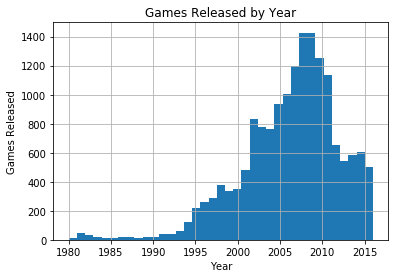

In [18]:
df_known_years['year'].hist(bins=37)
plt.title('Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Games Released')

Text(0, 0.5, 'Games Released')

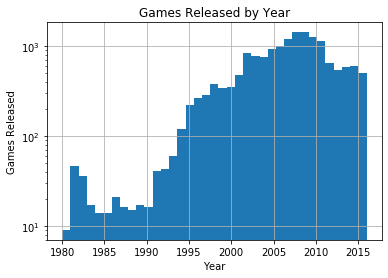

In [19]:
df_known_years['year'].hist(bins=37, log=True)
plt.title('Games Released by Year')
plt.xlabel('Year')
plt.ylabel('Games Released')

In [20]:
top_10_release_years = pd.DataFrame(df['year'].value_counts().head(10))
top_10_release_years.columns = ['num_games']
top_10_release_years

,num_games
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


Text(0, 0.5, 'Games Released')

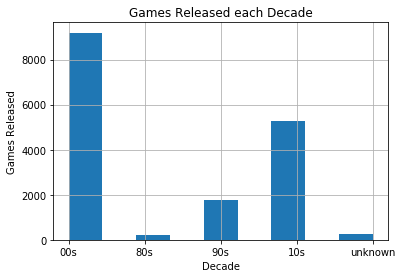

In [21]:
df['decade'].hist(bins=9, align='mid', grid=True)
plt.title('Games Released each Decade')
plt.xlabel('Decade')
plt.ylabel('Games Released')

In [22]:
df['decade'].value_counts()

00s        9193
10s        5277
90s        1769
unknown     269
80s         205
Name: decade, dtype: int64

- Looking at some of the data a visualization on release year, we can see that the number of games released each year has mostly been in creasing each year, until peaking in around 2008/2009. Each of the years from 2012 on released around half the amount of games compared to those peak years.
- If we look at the released games based on the decade, we see the same trend in growth from the 80s to the 00s. A little over halfway through the 10s, it looks like this decade will end up on a similar track to release the same amount of games as the 00s.
- The drop on the most recent decade also makes one wonder why the reduction in releases. Is it due to consolidation of game producers? Focus on fewer, higher quality games? Less interest in video games? Or some other factor?
- The small bar that shows 'unknown' years even if added to a single decade would not have a major effect on differences
- Lastly, two of the largest platforms, Playstation 2 and Xbox, were released in 200 and 2001 respectively. These major platform releases likely helped lead to the large growth in sales from 2000 to 2010

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
#### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [23]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc=('count', 'sum'))
platform_sales.columns = ['num_games', 'total_sales']
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)
platform_sales.head()

,num_games,total_sales
platform,,
PS2,2161,1062.33
X360,1262,885.66
Wii,1320,828.44
PS3,1331,803.97
DS,2151,746.86


In [24]:
ps2 = df[df['platform'] == 'PS2']
x360 = df[df['platform'] == 'X360']
wii = df[df['platform'] == 'Wii']
ps3 = df[df['platform'] == 'PS3']
ds = df[df['platform'] == 'DS']

In [25]:
def format_platform_sales(z, non_year):
    '''
    Specific to the above  platform specific dfs. Input one df and returns a new table grouped by year showing the aggregate
    total sales and the number of games released in that year.
    '''
    res = z.groupby(['year'])['total_sales'].agg(['count', 'sum'])
    res.columns = ['num_games', 'sales']
    res = res.reset_index()
    res = res[res['year'] > non_year]
    return res

In [26]:
ps2_sales = format_platform_sales(ps2,0)
x360_sales = format_platform_sales(x360,0)
wii_sales = format_platform_sales(wii,0)
ps3_sales = format_platform_sales(ps3,0)
ds_sales = format_platform_sales(ds,2000)

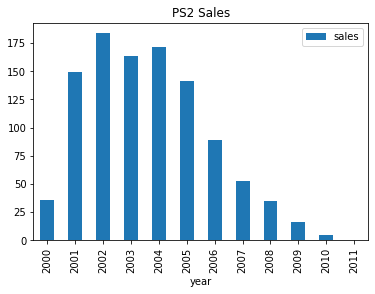

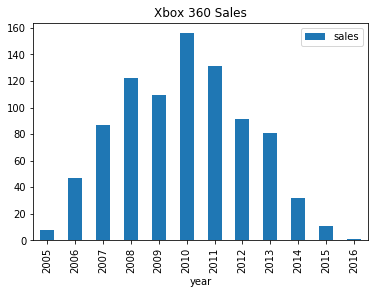

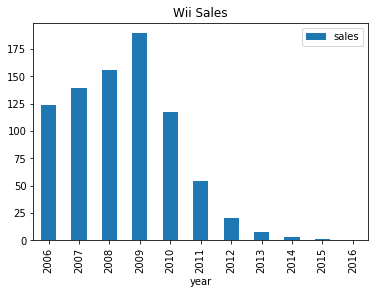

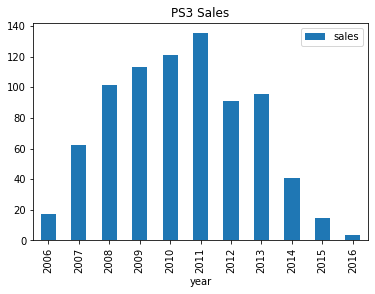

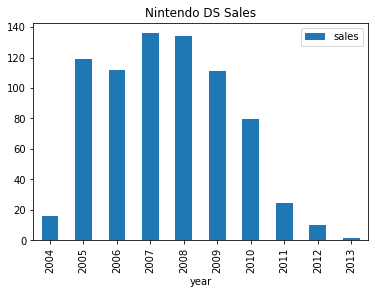

In [27]:
ps2_sales.plot(kind='bar', x='year', y='sales', xlim=(1998, 2012))
plt.title('PS2 Sales')
plt.show()

x360_sales.plot(kind='bar', x='year', y='sales', xlim=(2004, 2018))
plt.title('Xbox 360 Sales')
plt.show()

wii_sales.plot(kind='bar', x='year', y='sales', xlim=(2004, 2018))
plt.title('Wii Sales')
plt.show()

ps3_sales.plot(kind='bar', x='year', y='sales', xlim=(2005, 2018))
plt.title('PS3 Sales')
plt.show()

ds_sales.plot(kind='bar', x='year', y='sales', xlim=(2003, 2014))
plt.title('Nintendo DS Sales')
plt.show()

#### Looking at the above data on the top 5 selling platforms:
- PS2
    - Peak Sales Amount: 180 million
    - Relevant Years: 2000 - 2011 (11 years)
    - Years from Peak to end of sales: 9
    - The PS2 was released in 2000 and peaked around 2002. Sales then declined until about 2011. This is especially interesting becaause the PS3 wa released in 2006 when sales begin to drop further as people likely started moving to the new platform.
- Xbox 360
    - Peak Sales Amount: ~160 million
    - Relevant Years: 2005 - 2016 (11 years)
    - Years from Peak to end of sales: 6
    - The Xbox 360 had an even rise and fall starting in 2005, peaking in 2010, and losing its relevance around 2016
- Wii
    - Peak Sales Amount: ~180 million
    - Relevant Years: 2006 - 2016 (10 years)
    - Years from Peak to end of sales: 7
    - The Wii had the highest initial sales in the same year as it was released in 2006 (perhaps due to the hype around the motion capture technology at the time). Wii sales peaked in 2009 and then sharply dropped over the next few years until sales were almost nothing in 2016.
- PS3
    - Peak Sales Amount: ~140 million
    - Relevant Years: 2006 - 2016 (10 years)
    - Years from Peak to end of sales: 5
    - PS3 sales were similar to the Xbox 360 with asteady rise and fall in sales. Starting in 2006, peaking in 2011, and finally losing relevance in 2016
- DS
    - Peak Sales Amount: ~140 million
    - Relevant Years: 2004 - 2013 (9 years)
    - Years from Peak to end of sales: 6
    - DS sales had a slow first year, but then had a spike and strong sales from 2005 to 2009 and then fell drastically each year until 2013
- Overall:
    - The average time for a top platform to be released and lose it relevancy is about 10 years
    - The average time to lose relevancy from its peak in sales is about 7 years
    - New platforms from different creators are often released in similar years, but the largest creators release new versions of their platforms around every 6 years

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
#### Work only with the data that you've decided is relevant. Disregard the data for previous years.

Based on the prior analysis and data, most platforms lose relevancy after being in the market for about 10 years, but they also have some overlap in sales for the new platforms. To be forward looking towards 2017 and beyond, I am going to work with the most recent 4 years of data (2013-2016) as many of the top new platforms were released in that time frame and will still have relevancy for about the next 5+ years.

In [28]:
year_filt = df[df['year'] >= 2013]
year_filt.shape

(2233, 13)

#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [29]:
recent_sales = year_filt[(year_filt['total_sales'] > 0)]
recent_sales['platform'].value_counts()

PS4     392
PSV     358
PS3     345
3DS     303
XOne    247
PC      189
X360    186
WiiU    115
PSP      67
Wii      23
DS        8
Name: platform, dtype: int64

In [30]:
sales_in_2016 = year_filt[(year_filt['total_sales'] > 0) & (year_filt['year'] == 2016)]
sales_in_2016['platform'].value_counts()

PS4     164
XOne     87
PSV      85
PC       54
3DS      46
PS3      38
WiiU     14
X360     13
Wii       1
Name: platform, dtype: int64

In [31]:
sale = year_filt.groupby(['platform', 'year'])['total_sales'].agg('sum')
#sale['yoy_change'] = sale['sum'].pct_change()
sale = sale.reset_index()
sale

,platform,year,total_sales
0,3DS,2013,53.97
1,3DS,2014,41.75
2,3DS,2015,26.75
3,3DS,2016,14.50
4,DS,2013,1.42
5,PC,2013,11.27
6,PC,2014,12.38
7,PC,2015,7.93
8,PC,2016,4.89
9,PS3,2013,95.85


Text(0.5, 0, 'Year')

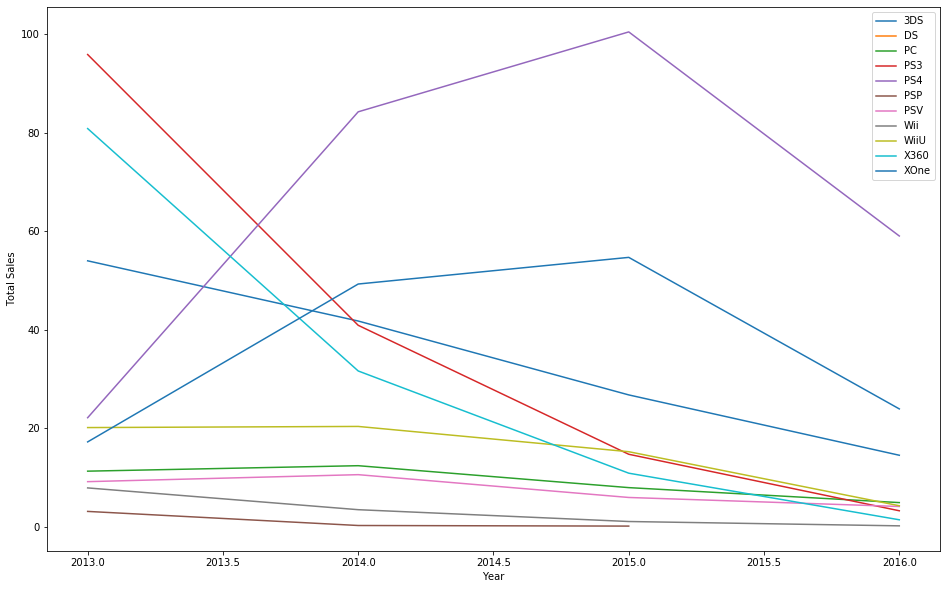

In [32]:
groups = sale.groupby('platform')
plt.figure(figsize=(16,10))
for name, group in groups:
    plt.plot(group["year"], group["total_sales"], label=name)
plt.legend()
plt.ylabel('Total Sales')
plt.xlabel('Year')

The top five selling platforms shown before (PS2, X360, Wii, PS3, DS) have all lost most of their sales by or before 2016 as new platforms have come about. In the above slice I looked at the count of values for each platform still making sales in 2016. The total sales from 2013 to 2016 are not showing much growth on any particular platform, but it is clear that the newer ones have been selling more in recent years. There are a couple of old ones, but I am going to focus on the newer platforms (in the new_consoles list below) as their sales are higher and/or growing.

In [33]:
new_consoles = ['PS4', 'XOne', 'PSV', 'PC', '3DS', 'WiiU']
df2 = recent_sales[recent_sales['platform'].isin(new_consoles)].reset_index()
df2.head()

,index,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,decade,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,No Rating,10s,12.25
1,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,No Rating,10s,13.82
2,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10s,10.65
3,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,No Rating,10s,10.94
4,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,10s,7.30


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1604 non-null   int64  
 1   name          1604 non-null   object 
 2   platform      1604 non-null   object 
 3   year          1604 non-null   int64  
 4   genre         1604 non-null   object 
 5   na_sales      1604 non-null   float64
 6   eu_sales      1604 non-null   float64
 7   jp_sales      1604 non-null   float64
 8   other_sales   1604 non-null   float64
 9   critic_score  1604 non-null   float64
 10  user_score    1604 non-null   float64
 11  rating        1604 non-null   object 
 12  decade        1604 non-null   object 
 13  total_sales   1604 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 175.6+ KB


#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

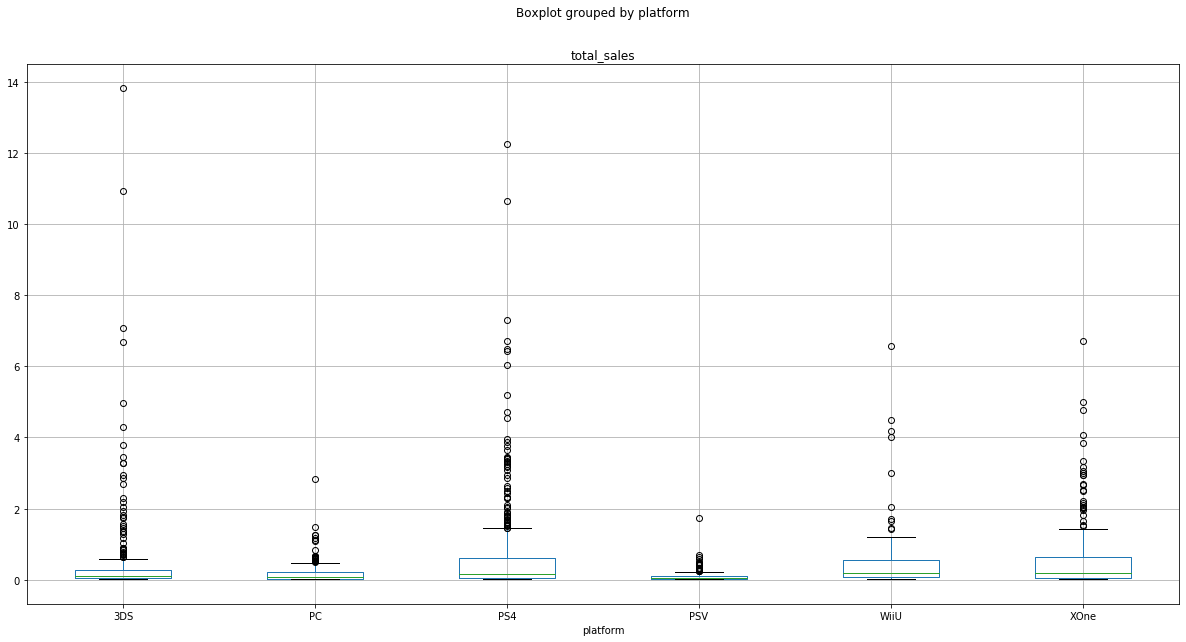

In [35]:
df2.boxplot(column='total_sales', by='platform', figsize=(20, 10))

Based on the box plots and statistics laid out above for the newer consoles, there are a few takeaways:
- There are some significant differences in the total sales by platform which range from 29 million(PSV) to 265 million(PS4)
- Mean and Median Sales for each platform had smaller differences for mean and median sales numbers per game:
    - PS4: Mean - 0.678 million and Median: 0.17 million
    - XOne: Mean - 0.58 million and Median: 0.2 million
    - PSV: Mean - 0.619 million and Median: 0.07 million
    - PC: Mean - 0.19 million and Median: 0.07 million
    - 3DS: Mean - 0.45 million and Median: 0.09 million
    - WiiU: Mean - 0.52 million and Median: 0.19 million
- It is of note that there are large discrepancies between the mean and median on each platform. With that information and based on outliers in the box plots, it can be seen that most games only make between 70-200 thousand in sales. But then, there are major outliers that can make well over 1 million on each platform which causes the positive skew. The major outliers likely represent the big blockbuster games that have the biggest budgets and advertising teams, helping create more sales for the games

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [36]:
ps4_df = df[(df['platform'] == 'PS4') & (df['critic_score'] > 0) & (df['user_score'] > 0.01)]
# removing unrated data based on ratings/

              critic_score  total_sales
critic_score      1.000000     0.405223
total_sales       0.405223     1.000000


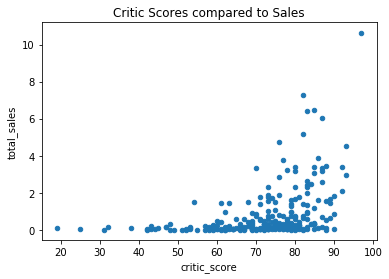

In [37]:
ps4_df.plot(kind='scatter', x='critic_score', y='total_sales')
plt.title('Critic Scores compared to Sales')
print(ps4_df[['critic_score', 'total_sales']].corr())

             user_score  total_sales
user_score     1.000000    -0.032923
total_sales   -0.032923     1.000000


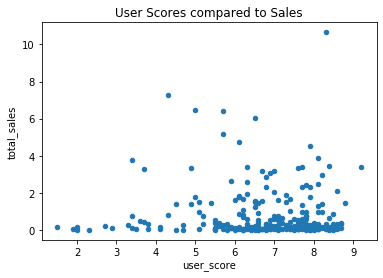

In [38]:
ps4_df.plot(kind='scatter', x='user_score', y='total_sales')
plt.title('User Scores compared to Sales')
print(ps4_df[['user_score', 'total_sales']].corr())

Critic scores have a positive correlation of about 40% showing that in general, that as critic scores increase, so do sales of the game

User scores on the other hand are different. They have the smallest negative correlation, but it is close enough to 0 to basically say there is no correlation. Sales numbers may be high or low regardless of what user may think and vice versa.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [39]:
dup = df2[df2.duplicated('name', keep=False) == True]

by_name = pd.DataFrame(dup.groupby(['name', 'platform'])['total_sales'].agg('sum')).reset_index()
by_name.head(10)

,name,platform,total_sales
0,7 Days to Die,PS4,0.12
1,7 Days to Die,XOne,0.05
2,Adventure Time: Explore the Dungeon Because I ...,3DS,0.13
3,Adventure Time: Explore the Dungeon Because I ...,WiiU,0.03
4,Adventure Time: Finn & Jake Investigations,3DS,0.08
5,Adventure Time: Finn & Jake Investigations,PS4,0.08
6,Adventure Time: Finn & Jake Investigations,WiiU,0.05
7,Adventure Time: Finn & Jake Investigations,XOne,0.05
8,Aegis of Earth: Protonovus Assault,PS4,0.02
9,Aegis of Earth: Protonovus Assault,PSV,0.02


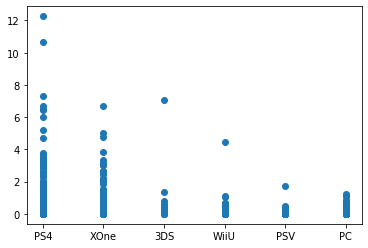

In [40]:
plt.scatter(by_name['platform'], by_name['total_sales']) # exactly the same as yours from local machine =)

In [41]:
dup_group = pd.DataFrame(dup.groupby('platform')['total_sales'].agg('sum'))
dup_group['total_sales'].sort_values(ascending=False)

platform
PS4     225.51
XOne    121.01
PC       22.67
WiiU     20.41
3DS      18.22
PSV      11.60
Name: total_sales, dtype: float64

After filtering out games released only on a single platform, I could group and visualize the data to see which platforms had the most sales when games crossed multiple. In general, PS4 was the leader and was almost double the second most in sales XOne and both of those were much higher than the rest of the modern platforms.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [42]:
genre_groups = pd.DataFrame(df2.groupby('genre')['total_sales'].agg(['sum', 'count']))
genre_groups.columns = ['total_sales', 'num_games']
genre_groups['profit_per_game'] = genre_groups['total_sales'] / genre_groups['num_games']
genre_groups = genre_groups.sort_values(by='profit_per_game', ascending=False).reset_index()
genre_groups

,genre,total_sales,num_games,profit_per_game
0,Shooter,144.82,122,1.187049
1,Sports,78.77,127,0.620236
2,Platform,31.09,55,0.565273
3,Role-Playing,114.76,228,0.503333
4,Fighting,24.01,48,0.500208
5,Racing,27.15,60,0.452500
6,Simulation,18.54,50,0.370800
7,Action,177.26,568,0.312077
8,Misc,31.57,112,0.281875
9,Puzzle,2.97,16,0.185625


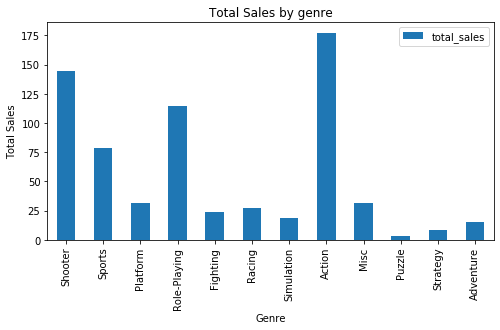

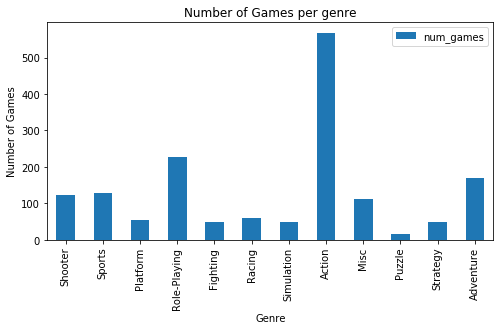

In [43]:
genre_groups.plot(kind='bar', x='genre', y='total_sales', figsize=(8,4))
plt.title('Total Sales by genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
genre_groups.plot(kind='bar', x='genre', y='num_games', figsize=(8,4))
plt.title('Number of Games per genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()

In [44]:
genre_groups.corr()

,total_sales,num_games,profit_per_game
total_sales,1.000000,0.790685,0.539131
num_games,0.790685,1.000000,-0.053747
profit_per_game,0.539131,-0.053747,1.000000


The most profitable genres are shooter, sports, platform, role_playing, and fighting. Although action may have the highest sales, it also has the most number of games, which reduces the profitability for each game.

In terms of correlations, the number of games has a strong positive correlation to the total sales, but a slightly negative correlation with profit per game. Those games with higher total sales are often accompanied by a large number of games and those that have lower total sales have a fewer number of games.

## Step 4: Create a User Profile for each Region

For each region (NA, EU, JP), determine:

#### The top five platforms. Describe variations in their market shares from region to region.

In [45]:
# group data into regions:
na = df2.groupby('platform')['na_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
na['mkt_share'] = (na['sum'] / na['sum'].sum())
na.columns = ['platform', 'na_games', 'na_sales','na_mkt_share']

eu = df2.groupby('platform')['eu_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
eu['mkt_share'] = (eu['sum'] / eu['sum'].sum())
eu.columns = ['platform', 'eu_games', 'eu_sales', 'eu_mkt_share']

jp = df2.groupby('platform')['jp_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
jp['mkt_share'] = (jp['sum'] / jp['sum'].sum())
jp.columns = ['platform', 'jp_games', 'jp_sales', 'jp_mkt_share']

In [46]:
display(na.head(5))
display(eu.head(5))
display(jp.head(5))

,platform,na_games,na_sales,na_mkt_share
0,PS4,392,108.74,0.380982
1,XOne,247,93.12,0.326256
2,3DS,303,38.20,0.133838
3,WiiU,115,29.21,0.102340
4,PC,189,11.11,0.038925


,platform,eu_games,eu_sales,eu_mkt_share
0,PS4,392,141.09,0.513148
1,XOne,247,51.59,0.187634
2,3DS,303,30.96,0.112602
3,PC,189,25.36,0.092235
4,WiiU,115,19.85,0.072195


,platform,jp_games,jp_sales,jp_mkt_share
0,3DS,303,67.81,0.597024
1,PSV,358,18.59,0.163673
2,PS4,392,15.96,0.140518
3,WiiU,115,10.88,0.095792
4,XOne,247,0.34,0.002993


When split between the regions sales are somewhat similar in NA and EU, where both have nearly the same order in top selling platforms lead by the PS4, XOne, and 3DS. The PS4 is more dominant in EU, more than double the sales and market share of any other platform, while the XOne is a strong competitor with the PS4 in NA. JP on the other hand seems to prefer handheld platforms, particularly the 3DS and the PSV. General sales in JP are not as high as the other regions, but the region is dominated by the 3Ds with about 60% of market share.

#### The top five genres. Explain the difference.

In [47]:
nag = df2.groupby('genre')['na_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
nag['g_share'] = nag['sum'] / nag['sum'].sum()
nag.columns = ['genre', 'na_games', 'na_sales', 'na_gshare']

eug = df2.groupby('genre')['eu_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
eug['ppg'] = eug['sum'] / eug['sum'].sum()
eug.columns = ['genre', 'eu_games', 'eu_sales', 'eu_gshare']

jpg = df2.groupby('genre')['jp_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
jpg['ppg'] = jpg['sum'] / jpg['sum'].sum()
jpg.columns = ['genre', 'jp_games', 'jp_sales', 'jp_gshare']


In [48]:
display(nag)
display(eug)
display(jpg)

,genre,na_games,na_sales,na_gshare
0,Shooter,122,75.37,0.264067
1,Action,568,73.43,0.257270
2,Role-Playing,228,37.92,0.132857
3,Sports,127,37.09,0.129949
4,Platform,55,14.18,0.049681
5,Misc,112,12.69,0.044461
6,Fighting,48,12.10,0.042394
7,Racing,60,10.29,0.036052
8,Adventure,169,4.57,0.016011
9,Simulation,50,4.08,0.014295


,genre,eu_games,eu_sales,eu_gshare
0,Action,568,73.96,0.268994
1,Shooter,122,64.89,0.236007
2,Sports,127,38.63,0.140498
3,Role-Playing,228,32.00,0.116385
4,Racing,60,15.18,0.055210
5,Platform,55,12.16,0.044226
6,Misc,112,10.61,0.038589
7,Simulation,50,10.17,0.036989
8,Fighting,48,6.58,0.023932
9,Adventure,169,5.88,0.021386


,genre,jp_games,jp_sales,jp_gshare
0,Role-Playing,228,44.84,0.394788
1,Action,568,29.87,0.262986
2,Misc,112,8.27,0.072812
3,Fighting,48,5.33,0.046927
4,Platform,55,4.75,0.041821
5,Shooter,122,4.56,0.040148
6,Adventure,169,4.37,0.038475
7,Simulation,50,4.29,0.037771
8,Sports,127,3.05,0.026853
9,Racing,60,1.68,0.014791


Similar to platforms, NA and EU have a similar breakdown for top selling genres. The top for in both are action, shooter, role-playing, and sports. For both fo those regions these top four categories take up about 75% of the market share. It seems logical that since the two regions have the same popular platforms, they are exposed to the same popular games and specific genres of games that come on those platforms. On the other hand JP prefers role-playing games more than anything with nearly 40% of the market. The role0playing genre and the action genre are the only two in the JP region with a market share greater than 10%. The sports genre, which is popular in NA and EU (ranked 3 and 4 respectively), is ranke rather low in Japan at number 9 which could be due to the fact that sports may be more popular in NA and EU.

#### Do ESRB ratings affect sales in individual regions?

In [49]:
df2['rating'].value_counts()

No Rating    727
M            255
T            238
E            206
E10+         178
Name: rating, dtype: int64

In [50]:
na_rate = df2.groupby('rating')['na_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
na_rate.columns = ['rating', 'na_games', 'na_sales']

eu_rate = df2.groupby('rating')['eu_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
eu_rate.columns = ['rating', 'eu_games', 'eu_sales']

jp_rate = df2.groupby('rating')['jp_sales'].agg(['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
eu_rate.columns = ['rating', 'eu_games', 'eu_sales']

In [51]:
display(na_rate)
display(eu_rate)
display(jp_rate)

,rating,na_games,na_sales
0,M,255,97.05
1,No Rating,727,68.68
2,E,206,52.37
3,T,238,35.07
4,E10+,178,32.25


,rating,eu_games,eu_sales
0,M,255,94.51
1,No Rating,727,63.54
2,E,206,58.00
3,T,238,32.60
4,E10+,178,26.30


,rating,count,sum
0,No Rating,727,72.97
1,T,238,13.52
2,E,206,13.26
3,M,255,8.17
4,E10+,178,5.66


It is difficult to conclude how much of an effect ESRB rating has on sales. Since a large portion of games do not have a rating, and the proportion in each region of games without a rating is significant, knowing what category they fall in could have a major effect on results. So the fact that 'No Rating' games have the 1st or 2nd highest sales in each reason means it cannot be ignored, but it makes the conclusions ambiguous.

Based on the ratings that are available, games rated M top the charts in NA and EU, showing further evidence of how similar these markets are in the platforms, genres, and rated games they buy. JP is different again with no rating topping the chart by more the 5x the next rating, which makes it unknown to us whether we can conclude anything in Japan. What we can say by the rating compared to the other regions is that JP sales of M rated games are much less.

## Step 5: Test the Hypotheses


Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

### Hypothesis 1:
- Null: The average user ratings of the Xbox One and PC platforms are the same
- Alternative: The average user ratings of the Xbox One and PC platforms are not the same

In [52]:
xs = df2[df2['platform'] == 'XOne']
ps = df2[df2['platform'] == 'PC']

samp_1 = xs['user_score']
samp_2 = ps['user_score']
alpha = 0.05

print('Hypothesis 1 Results: \n')

results = st.mannwhitneyu(samp_1, samp_2)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Hypothesis 1 Results: 

p-value:  0.15507335579117215
We can't reject the null hypothesis


Using the alpha of 0.05, we find that we are unable to reject the null. The p-value of 0.155, which is above the alpha, is too high to reject that the average user scores for XOne and PC are the same.

### Hypothesis 2:
- Null: The average user ratings for the Action and Sports genres are different.
- Alternative: The average user ratings for the Action and Sports genres are not significantly different.

In [53]:
action = df2[df2['genre'] == 'Action']
sports = df2[df2['genre'] == 'Sports']

s_1 = action['user_score']
s_2 = sports['user_score']
alpha = 0.05

print('Hypothesis 2 Results: \n')

res = st.mannwhitneyu(s_1, s_2)

print('p-value: ', res.pvalue)

if (res.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Hypothesis 2 Results: 

p-value:  0.04774636719589825
We reject the null hypothesis


Using the alpha of 0.05, we reject the null hypothesis that the average user scores for action and sport genres differ. The p-value falls just below our set alpha causng us to reject.

## Step 6: General Conclusion

- The overall strategy for Ice should stick with the latest platform models that are most popular in each region. The market is nearing the end of the life cycle for some of the platforms, but there is still potential for hit games to come out. 
- Regionally we see many similarities in the NA and EU markets, but some important differences in the JP region. In NA and EU, they prefer the larger platforms (PS4, XONE), games with action and sports, and those with M ratings. In JP on the other hand, they seem to prefer the handheld platforms such as the 3DS and the PSV, playing mainly role-playing games where the ESRB rating is unclear, but unlikely to be rated M. These are the areas that should be focused on in each of the regions.
- The store should also recognize the power of critic scores. They have a higher positive correlation to sales, when compared to user scores. This does not mean that higher critic scores cause higher sales, but games that have high critic scores a more likely to sell more.